# <center>Метрики кластеризации</center>

Существует ряд метрик, которые можно подсчитать, **если данные размечены**.

## Однородность кластеров

>Кластер считается однородным, если в нём содержатся объекты, принадлежащие только к одному кластеру.

Значение метрики уменьшается, если объединить два разных кластера, которые содержат непохожие объекты.
$$ homogeneity = 1 - \frac{H(Y_{true}|Y_{pred})}{H(Y_{true})} $$
$Y_{true}$ - реальные значения номеров кластеров для элементов, $Y_{pred}$ - предсказанные значения номеров кластеров для элементов, $H$ - функция, которая называется **критерием информативности**, или **энтропией**.

Для $Y_{true}$, принимающей $n$ независимых значений $y_i$ с вероятностями $P(y_i)$, энтропия считается следующим образом:
$$ H(Y_{true}) = - \sum^n_{i=1}P(y_i) * \log P (y_i) $$
Условная энтропия $Y_true$ относительно $Y_pred$ рассчитывается так:
$$ H(Y_{true}|Y_{pred}) = H(Y_{true}, Y_{pred}) - H(Y_{pred}) $$
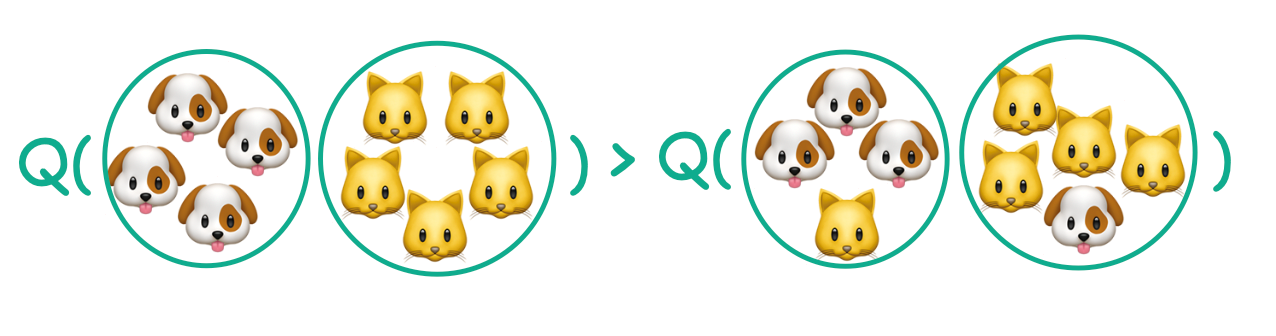

Допустим, наши 0 и 1 — это номера кластеров, в которых находятся кошки и собаки:
```python
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
> 1.0
print(homogeneity_score(labels_true=[0, 0, 0, 0], labels_pred=[1, 1, 0, 0]))
> 1.0
```
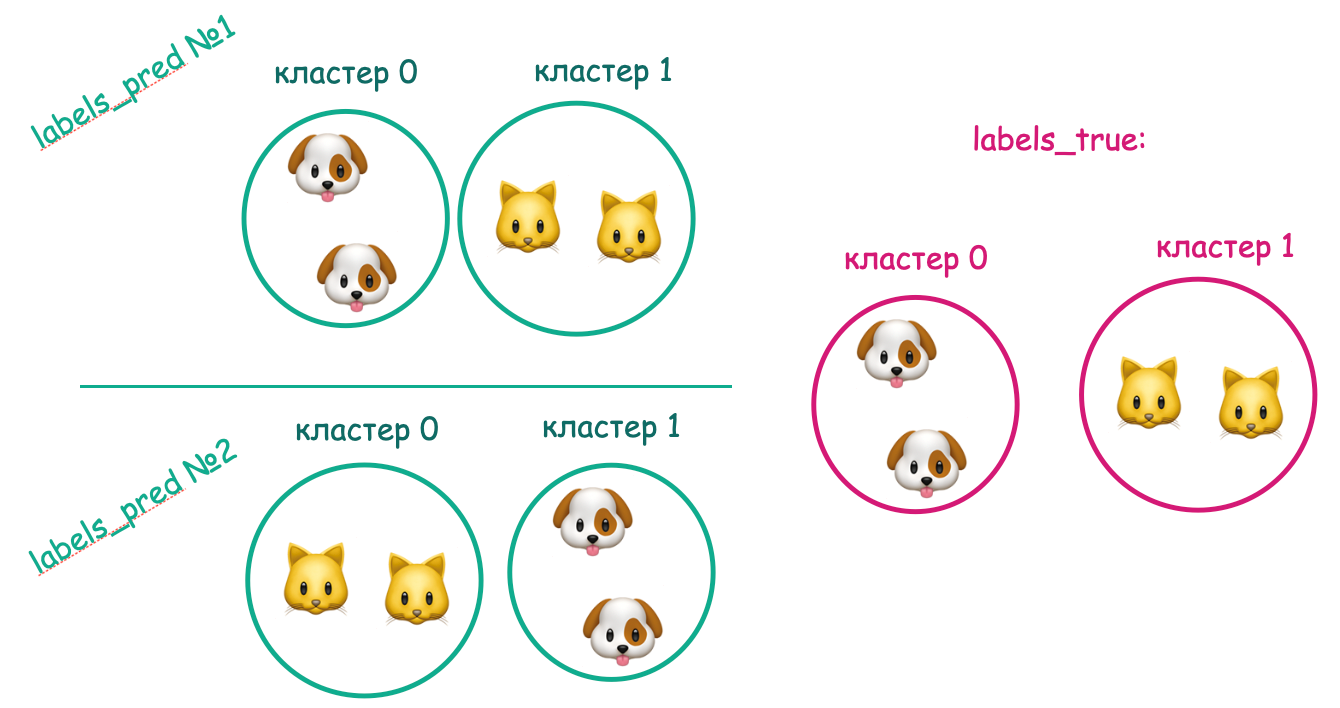

`labels_true` — это реальные значения: в кластере 0 — собаки, в кластере 1 — кошки. В первый раз мы предсказали, что в кластере 0 находятся две собаки, а в кластере 1 — две кошки. Метрика однородности равна 1, так как внутри кластеров разные объекты и наши ответы полностью совпали с `labels_true`.

Во втором случае, казалось бы, будет неверно, если в кластере 0 будут кошки, а в кластере 1 — собаки. Но, судя по составу кластеров, кошки и собаки не перемешались, поэтому однородность кластеров будет равна 1.

Рассмотрим метрику однородности на примере результатов кластеризации покемонов. Возьмём два случая — с тремя и четырьмя кластерами:

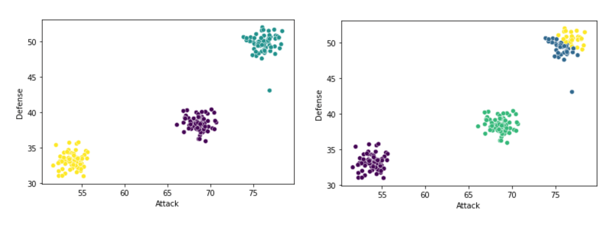

```python
# передадим информацию о том, какие на самом деле должны быть кластеры и результаты предсказания
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
>1.0
print(homogeneity_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
>1.0
```
Хоть мы и разделили данные на большее количество кластеров, внутри кластеров данные остались однородными.
## Полнота кластера (completeness score)
>Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру. Данную метрику можно вычислять, когда одновременно важны и наполненность кластеров, и их однородность.

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, при кластеризации оказались в одном кластере.

Значение метрики уменьшается, если эталонный кластер разделить на части. Например, если кластер, в котором находятся только собаки, разделить на два более мелких кластера, то метрика полноты у такой кластеризации будет меньше:

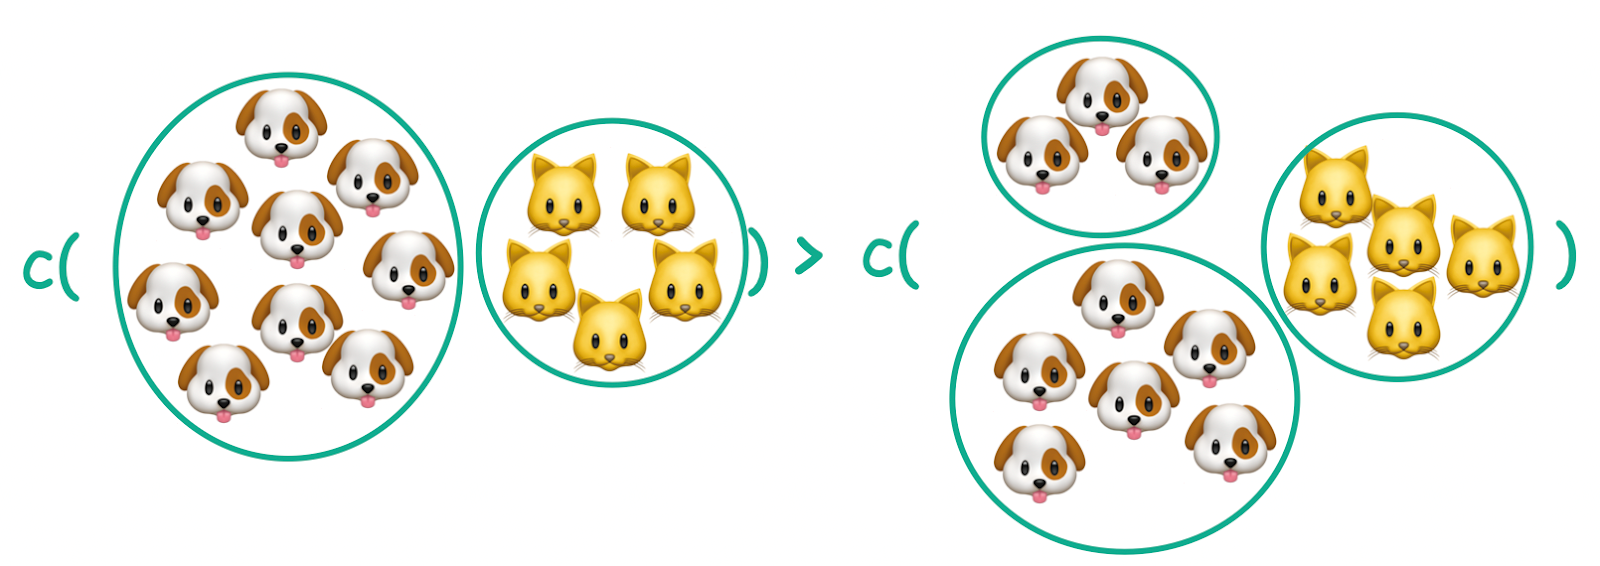

На рисунке выше $c$ — это **completeness**, или полнота.
$$completeness = 1 - \frac{H(Y_{pred}|Y_{true})}{H(Y_{pred})} $$
где $Y_{true}$ - реальные значения номеров кластеров для элементов, $Y_{pred}$ — предсказанные значения номеров кластеров для элементов, $H$ — функция, которая называется критерием информативности, или энтропией.

Для $Y_{pred}$, принимающей $n$ независимых значений $y_i$ с вероятностями $P(y_i)$, энтропия считается следующим образом:
$$ H(Y_{pred}) = - \sum^n_{i=1}P(y_i)*\log P(y_i) $$
Условная энтропия $Y_true$ относительно $Y_pred$ рассчитывается так:
$$ H(Y_{pred}|Y_{true}) = H(Y_{pred}, Y_{true}) - H(Y_{true}) $$
При максимальном заполнении кластеров схожими объектами полнота равняется 1 (когда есть один большой кластер со всеми собаками), при минимальном заполнении — 0.
```python
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])
>1.0
```
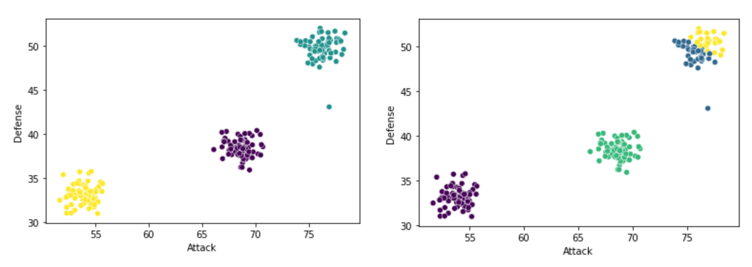
```python
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
> 1.0
# посчитаем, насколько полными получились кластеры с покемонами
print(completeness_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
> 0.829867483307009
```
Во втором случае третий кластер оказался неполным, так как предсказано, что половина объектов принадлежит к третьему кластеру, а другая половина — к четвёртому. Однако два других кластера предсказаны правильно, поэтому метрика полноты меньше 1, но всё же её значение не такое низкое.
## V-мера (V-measure)
Эта метрика — комбинация метрик полноты и однородности.
>Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

$$ v = \frac{(1+\beta) \times homogeneity \times completeness}{(\beta \times homogeneity + completeness)} $$

По умолчанию $\beta = 1$, но это значение можно варьировать, если хочется дать разный вес разным свойствам.
* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta < 1$. Тогда значение $\beta \times homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \times homogeneity$, тем выше $v$.
* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение $\beta$ так, чтобы $\beta > 1$.

>Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

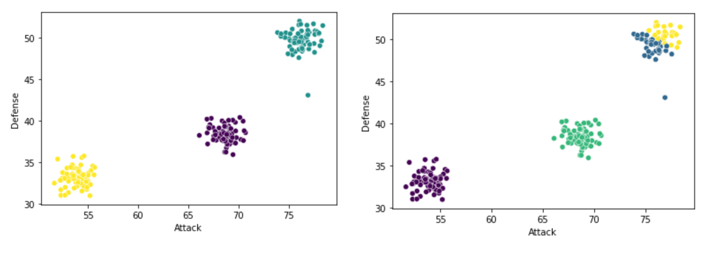
```python
# импортируем из библиотеки sklearn подсчёт V-меры
from sklearn.metrics import v_measure_score

# посчитаем V-меру для кластеров с покемонами
print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
>1.0

print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
>0.9070246789753754
```
В первом случае и полнота, и однородность кластеров были равны 1, поэтому V-мера, основанная на этих двух метриках, получила максимальное значение (1). Во втором случае полнота кластеризации была равна 0.83, так как один из кластеров был наполнен наполовину. Этот факт отразился и на значении V-меры, но, так как однородность кластеров имела максимальное значение,V-мера приняла значение 0.9.
## Индекс Рэнда
Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (*number of agreeing pairs*), среди предсказанных и размеченных данных.
$$ Rand \space Index = \frac{number \space of \space agreeing \space pairs}{number \space of \space pairs} $$
где $number \space of \space pairs$ - общее количество пар, $number \space of \space agreeing \space pairs$ — количество пар, для которых предсказание и истинные значения совпали.

По сути, данная метрика подсчитывает, для какой доли объектов датасета мы правильно определили кластер.

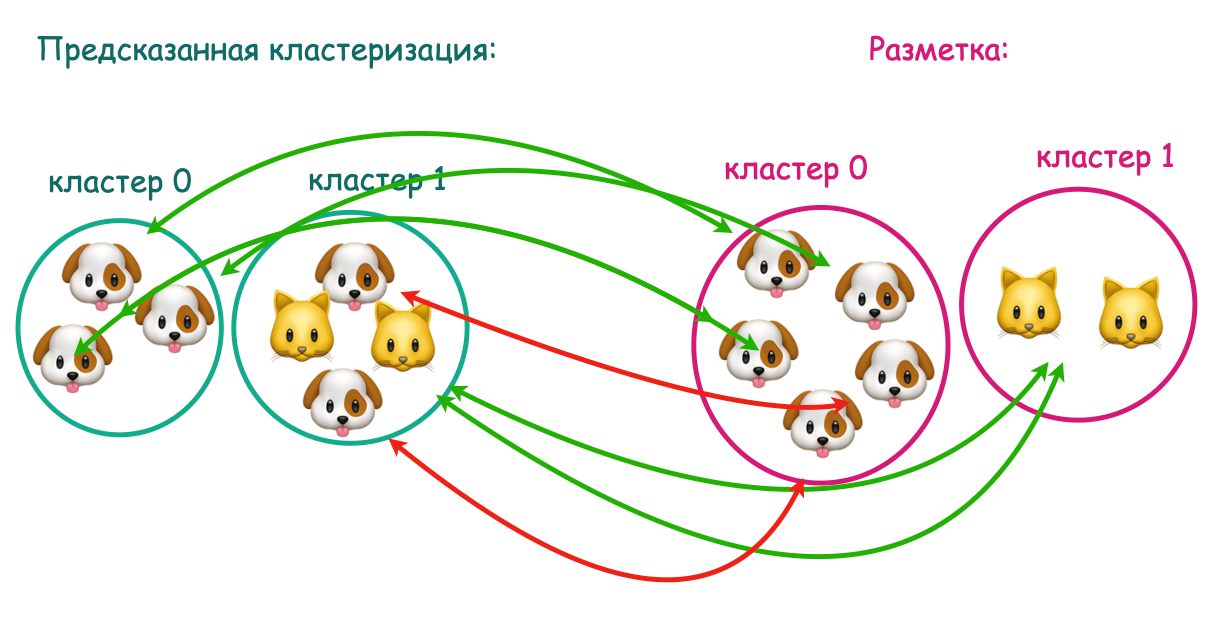

`number of agreeing pairs = 5`, т. е. для трёх собак и двух кошек кластеры были предсказаны верно, а для двух пар (они соединены красной линией) — неверно.

`number of pairs = 7`

Таким образом, $Rand \space Index = 5 / 7 = 0.71 $
```python
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0
```
В данном случае мы получили индекс Рэнда, равный 1. Это означает, что все объекты в предсказанном кластере попали в те кластеры, в которые должны были попасть.

* `sklearn.metrics.cluster.homogeneity_score()` - Однородность
* `sklearn.metrics.cluster.completeness_score()` - Полнота
* `sklearn.metrics.cluster.v_measure_score()` - V-мера
* `sklearn.metrics.cluster.rand_score()` - Индекс Рэнда

In [2]:
# 3.3
from sklearn.metrics import cluster
y_true = [1, 2, 2, 1, 0]
y_pred = [1, 0, 2, 1, 2]
cluster.homogeneity_score(y_true, y_pred).round(2)

0.74